In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hs = [0.01, 0.001]
a, b = [0, np.pi / 2]

In [3]:
p = 0
q = 1
f = 1

# Часть 1

In [4]:
def Anal_Solution(x):
    return -np.sin(x) - np.cos(x) + 1

def TDMA(h, N, y0, yn ,c1=1, c2=0):
    
    alpha = 1 + (p * h / 2)
    beta = -2 + h ** 2 * q
    gamma = 1 - (p * h / 2)
    delta = f * h ** 2

    A = np.empty(N)
    B = np.empty(N)
    A[0] = -c2 / (c1 * h - c2)
    B[0] = (y0 * h) / (c1 * h - c2)
    for i in range(1, N):
        A[i] = -alpha / (beta + gamma * A[i - 1])
        B[i] = (delta - gamma * B[i - 1]) / (beta + gamma * A[i - 1])
    u = np.zeros(N)
    u[-1] = yn
    for i in range(N - 2, 1, -1):
        u[i] = u[i + 1] * A[i - 1] + B[i - 1]
    u[0] = y0
    return u

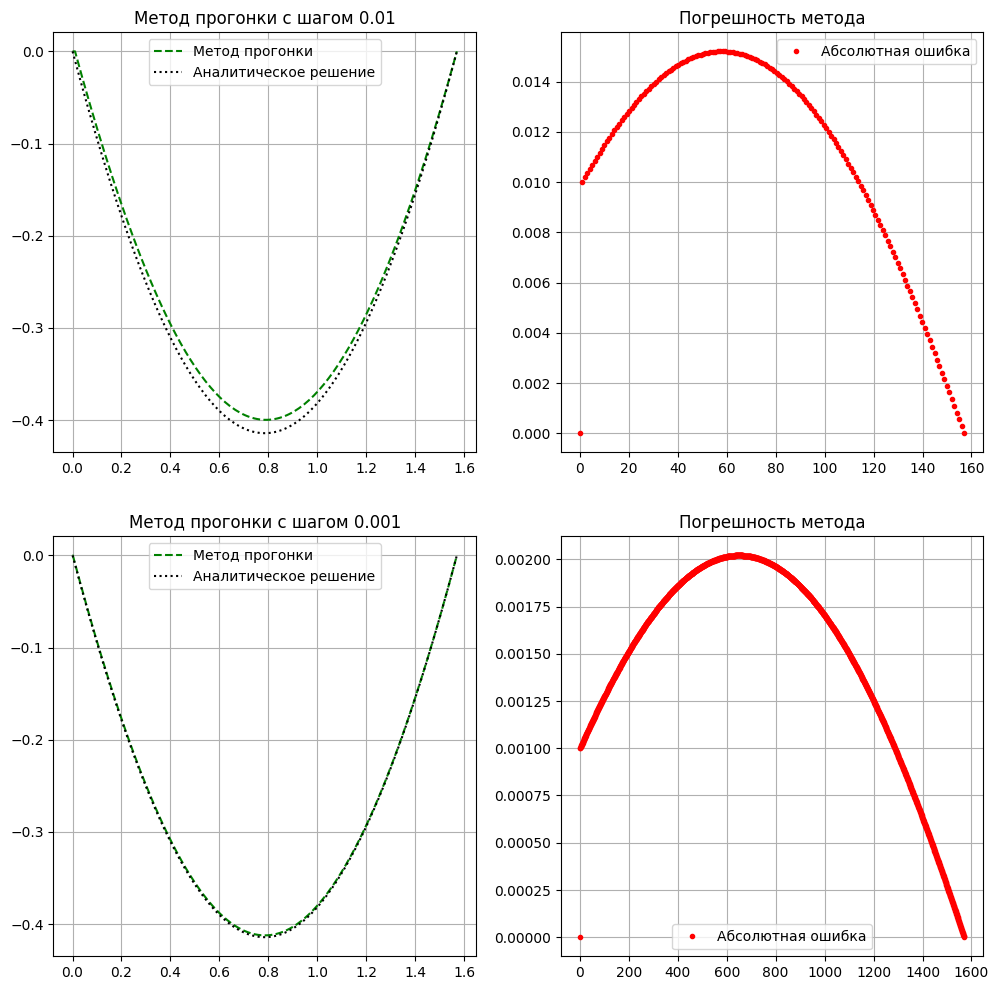

In [5]:
fig, axis = plt.subplots(nrows=2, ncols=2)

fig.set_figwidth(12)
fig.set_figheight(12)

for i, h in zip(range(2), hs):


    N = int((b - a) / h)
    x = np.linspace(a, b, N)
    y = np.empty(N)
    y[0] = 0
    y[-1] = 0



    axis[i, 0].plot(x, TDMA(h, N, y[0], y[-1]), '--', color='green', label='Метод прогонки')
    axis[i, 0].plot(x, Anal_Solution(x), ':', color='black', label='Аналитическое решение')

    axis[i, 0].legend()
    axis[i, 0].set_title(f'Метод прогонки с шагом {h}')
    axis[i, 0].grid()

    axis[i, 1].plot(np.linspace(0, N, N), abs(TDMA(h, N, y[0], y[-1]) - Anal_Solution(x)), '.', color='red', label='Абсолютная ошибка')
    axis[i, 1].legend()
    axis[i, 1].set_title('Погрешность метода')
    axis[i, 1].grid()
    
fig.savefig('1.png', dpi=600)

# Часть 2

In [6]:
def runge(x):
    return 1 / (1 + x ** 2)

In [7]:
def spline_3(i, x_node, h, x_seg):
    f = runge
    return ((((x_node[i+1] - x_seg)**2 * (2 * (x_seg - x_node[i]) + h)) * f(x_node[i]) +
            ((x_seg - x_node[i])**2 * (2*(x_node[i+1] - x_seg) + h)) * f(x_node[i+1])) / (h**3) +
            ((x_node[i+1] - x_seg)**2 * (x_seg - x_node[i]) * m[i] + 
            (x_seg - x_node[i])**2 * (x_seg - x_node[i+1]) * m[i+1]) / (h**2))

In [8]:
x = np.linspace(-4, 4, 13)
x1 = np.linspace(-4, 4, 400)
h = x[1] - x[0]
m = [1 for j in range(len(x))]
m[0] = (-3 * runge(x[0]) + 4 * runge(x[1]) - runge(x[2])) / (2 * h)
m[-1] = (3 * runge(x[-1]) - 4 * runge(x[-2]) + runge(x[-3])) / (2 * h)
alpha = 1
beta = 4
gamma = 1
# C1 = 1, d1 = 1, C2 = 0, d2 = 0
A, B = [0], [runge(x[0])]
for i in range(1, len(x) - 1):
    delta = (3 / h) * (runge(x[i + 1]) - runge(x[i - 1]))
    B.append((delta - gamma * B[-1]) / (beta + gamma * A[-1]))
    A.append(- alpha / (beta + gamma * A[-1]))
for k in range(1, len(x) - 1):
    m[-k-1] = m[-k]*A[-k] + B[-k]

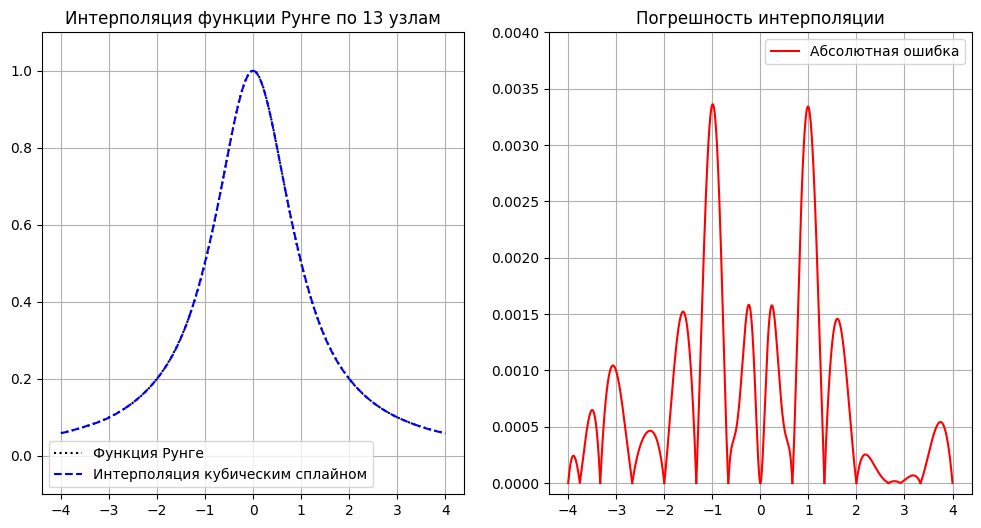

In [9]:
fig, axis = plt.subplots(nrows=1, ncols=2)

fig.set_figwidth(12)
fig.set_figheight(6)

errors = np.array([])

axis[0].plot(x1, runge(x1), ':', color='black', label='Функция Рунге')
for i in range(x.size - 1):
    x_seg = np.arange(x[i], x[i+1] + 1e-4, 1e-4)
    spline = spline_3(i, x, h, x_seg)
    axis[0].set_title(f'Интерполяция функции Рунге по {x.size} узлам')
    axis[1].set_title(f'Погрешность интерполяции')
    axis[0].set_ylim(-0.1, 1.1)
    axis[1].set_ylim(-0.0001, 0.004)
    axis[0].grid(True)
    
    error = abs(runge(x_seg) - spline)
    errors = np.append(errors, error)
    
    if i == 0:
        axis[0].plot(x_seg, spline, '--', color='blue', label='Интерполяция кубическим сплайном')
        axis[1].plot(x_seg, error, color='red', label='Абсолютная ошибка')
    else:
        axis[0].plot(x_seg, spline, '--', color='blue')
        axis[1].plot(x_seg, error, color='red')
        
    
    
axis[0].legend()
axis[1].grid()
axis[1].legend(loc='upper right')

In [10]:
def m_2(x):
    return -(50 * x) / ((1 + 25 * x * x) ** 2)

In [11]:
def m(i, x_node, h):
    
    f = runge
    
    if i == 0:
        return (-3 * f(x_node[0]) + 4 * f(x_node[1]) - f(x_node[2])) / (2 * h)
    if i == len(x_node)-1:
        return (3 * f(x_node[i]) - 4 * f(x_node[i-1] + f(x_node[i-2]))) / (2 * h)
    return (f(x_node[i+1]) - f(x_node[i-1])) / (2 * h)

In [12]:
def spline_3_old(i, x_node, h, x_seg):
    
    f = runge
   
    return ((((x_node[i+1] - x_seg)**2 * (2 * (x_seg - x_node[i]) + h)) * f(x_node[i]) +
            ((x_seg - x_node[i])**2 * (2*(x_node[i+1] - x_seg) + h)) * f(x_node[i+1])) / (h**3) +
            ((x_node[i+1] - x_seg)**2 * (x_seg - x_node[i]) * m(i, x_node, h) + 
            (x_seg - x_node[i])**2 * (x_seg - x_node[i+1]) * m(i+1, x_node, h)) / (h**2))

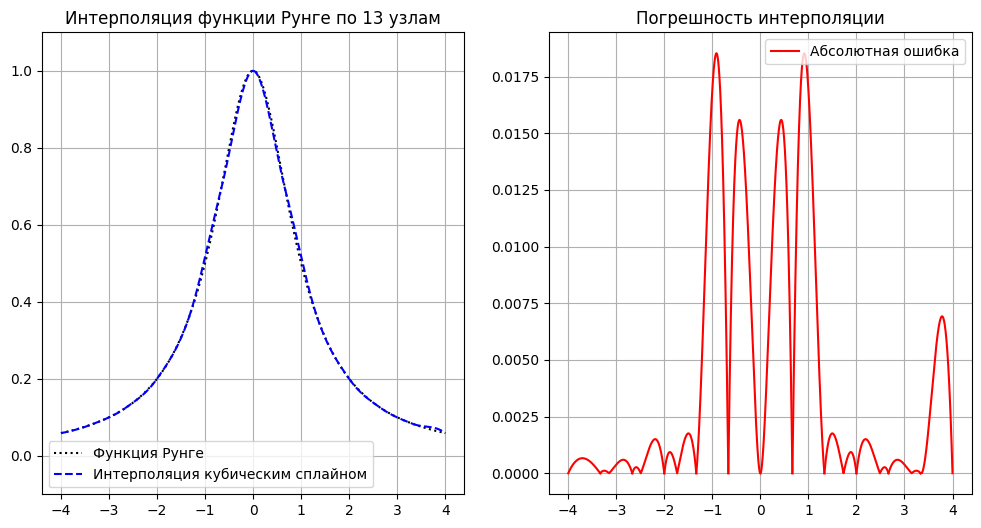

In [13]:
fig, axis = plt.subplots(nrows=1, ncols=2)

fig.set_figwidth(12)
fig.set_figheight(6)

errors_old = np.array([])

axis[0].plot(x1, runge(x1), ':', color='black', label='Функция Рунге')
for i in range(x.size - 1):
    x_seg = np.arange(x[i], x[i+1] + 1e-4, 1e-4)
    spline = spline_3_old(i, x, h, x_seg)
    axis[0].set_title(f'Интерполяция функции Рунге по {x.size} узлам')
    axis[1].set_title(f'Погрешность интерполяции')
    axis[0].set_ylim(-0.1, 1.1)
    #axis[1].set_ylim(-0.0001, 0.004)
    axis[0].grid(True)
    
    error = abs(runge(x_seg) - spline)
    errors_old = np.append(errors_old, error)
    
    if i == 0:
        axis[0].plot(x_seg, spline, '--', color='blue', label='Интерполяция кубическим сплайном')
        axis[1].plot(x_seg, error, color='red', label='Абсолютная ошибка')
    else:
        axis[0].plot(x_seg, spline, '--', color='blue')
        axis[1].plot(x_seg, error, color='red')
        
    
axis[0].legend()
axis[1].grid()
axis[1].legend(loc='upper right')

(-0.0001, 0.025)

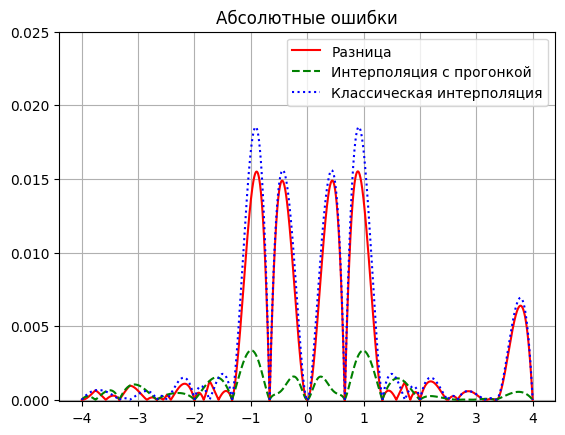

In [14]:
fig, axis = plt.subplots(1, 1)
pointer = 0
for i in range(x.size - 1):
    x_seg = np.arange(x[i], x[i+1] + 1e-4, 1e-4)
    if i == 0:
        axis.plot(x_seg, abs(errors[pointer : pointer + len(x_seg)] - errors_old[pointer : pointer + len(x_seg)]), color='red', label = 'Разница')
        axis.plot(x_seg, errors[pointer : pointer + len(x_seg)], '--', color='green', label = 'Интерполяция с прогонкой')
        axis.plot(x_seg, errors_old[pointer : pointer + len(x_seg)], ':', color='blue', label = 'Классическая интерполяция')
    else:
        axis.plot(x_seg, abs(errors[pointer : pointer + len(x_seg)] - errors_old[pointer : pointer + len(x_seg)]), color='red')
        axis.plot(x_seg, errors[pointer : pointer + len(x_seg)], '--', color='green')
        axis.plot(x_seg, errors_old[pointer : pointer + len(x_seg)], ':', color='blue')
    pointer += len(x_seg)
axis.set_title('Абсолютные ошибки')
axis.grid()
axis.legend()
#axis.set_xlim(-4.1, 3.1)
axis.set_ylim(-0.0001, 0.025)